## 뉴스 기사 분류: 다중 분류 문제
* 다중 분류(multiclass classifcation)
* 각 데이터 포인트가 정확히 하나의 범주로 분류되면, 단일 레이블 다중 분류(single-label, multiclass classification)
* 각 데이터 포인트가 여러 개의 범주에 속할 수 있다면 다중 레이블 다중 분류(multi-label, multiclass classification)

### 로이터 데이터셋

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [7]:
train_labels[10]

3

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [10]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### 모델 구성
* 이전에 사용했던 것처럼 Dense 층을 쌓으면 각 층은 이전 층의 출력에서 제공한 정보만 사용할 수 있다.
* 한 층이 분류 문제에 필요한 일부 정보를 누락하면 그다음 층에서 이를 복원할 방법이 없다.
* 각 층은 잠재적으로 정보의 병목(information bottleneck)이 될 수 있다.

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

* 이런 문제에 사용할 최선의 손실 함수는 categorical_crossentropy이다.
* 두 확률 분포 사이의 거리를 측정한다.
* 네트워크가 출력한 확률 분포와 진짜 레이블의 분포 사이의 거리이다.

In [12]:
model.compile(
    optimizer='rmsprop', 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### 훈련 검증

In [13]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(
    partial_X_train, partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 2s 18ms/step - loss: 2.7505 - accuracy: 0.4991 - val_loss: 1.8533 - val_accuracy: 0.6470
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: 1.4733 - accuracy: 0.7053 - val_loss: 1.3543 - val_accuracy: 0.6960
Epoch 3/20
16/16 [==============================] - 0s 9ms/step - loss: 1.0782 - accuracy: 0.7734 - val_loss: 1.1623 - val_accuracy: 0.7450
Epoch 4/20
16/16 [==============================] - 0s 8ms/step - loss: 0.8475 - accuracy: 0.8213 - val_loss: 1.0401 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 0s 7ms/step - loss: 0.6789 - accuracy: 0.8602 - val_loss: 1.0009 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 0s 8ms/step - loss: 0.5452 - accuracy: 0.8886 - val_loss: 0.9759 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 7ms/step - loss: 0.4386 - accuracy: 0.9099 - val_loss: 0.9216 - val_accuracy: 0.8170
Epoch 8/20
16/16 [=

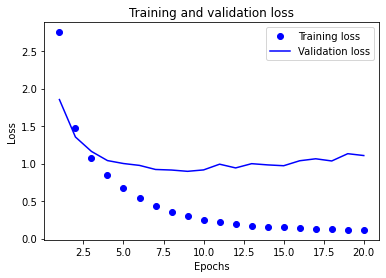

In [15]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

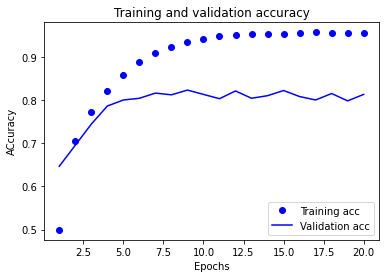

In [18]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('ACcuracy')
plt.legend()

plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(
    partial_X_train, partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(X_val, y_val)
)
results = model.evaluate(X_test, one_hot_test_labels)
results

Epoch 1/9
16/16 [==============================] - 0s 15ms/step - loss: 2.6486 - accuracy: 0.4991 - val_loss: 1.7566 - val_accuracy: 0.6240
Epoch 2/9
16/16 [==============================] - 0s 9ms/step - loss: 1.4621 - accuracy: 0.6918 - val_loss: 1.3286 - val_accuracy: 0.7110
Epoch 3/9
16/16 [==============================] - 0s 8ms/step - loss: 1.0990 - accuracy: 0.7721 - val_loss: 1.1559 - val_accuracy: 0.7550
Epoch 4/9
16/16 [==============================] - 0s 9ms/step - loss: 0.8605 - accuracy: 0.8206 - val_loss: 1.0534 - val_accuracy: 0.7790
Epoch 5/9
16/16 [==============================] - 0s 8ms/step - loss: 0.6862 - accuracy: 0.8571 - val_loss: 0.9692 - val_accuracy: 0.8060
Epoch 6/9
16/16 [==============================] - 0s 7ms/step - loss: 0.5487 - accuracy: 0.8845 - val_loss: 0.9277 - val_accuracy: 0.8110
Epoch 7/9
16/16 [==============================] - 0s 7ms/step - loss: 0.4398 - accuracy: 0.9075 - val_loss: 0.9174 - val_accuracy: 0.8110
Epoch 8/9
16/16 [=========

[0.9864881038665771, 0.7871772050857544]

In [20]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19367764915405164

### 새로운 데이터에 대해 예측하기

In [21]:
predictions = model.predict(X_test)

71/71 [==============================] - 0s 1ms/step


In [22]:
predictions[0].shape

(46,)

In [23]:
np.sum(predictions[0])

1.0

In [24]:
np.argmax(predictions[0])

3

### 레이블과 손실을 다루는 다른 방법
* 레이블을 인코딩하는 다른 방법은 다음과 같이 정수 텐서로 변환하는 것이다.
* `y_train = np.array(train_labels)`
* `y_test = np.array(test_labels)`
* 이 방식을 사용하려면 손실 함수 하나만 바꾸면 된다.
* 정수 레이블을 사용할 때는 `sparse_categorical_crossentropy`를 사용해야 한다.

### 충분히 큰 중간층을 두어야 하는 이유

In [25]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    partial_X_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_val, y_val)
)

Epoch 1/20
63/63 [==============================] - 1s 6ms/step - loss: 3.1310 - accuracy: 0.2151 - val_loss: 2.5633 - val_accuracy: 0.3350
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 2.0768 - accuracy: 0.3852 - val_loss: 1.7310 - val_accuracy: 0.6110
Epoch 3/20
63/63 [==============================] - 0s 3ms/step - loss: 1.3720 - accuracy: 0.6602 - val_loss: 1.3914 - val_accuracy: 0.6450
Epoch 4/20
63/63 [==============================] - 0s 3ms/step - loss: 1.1375 - accuracy: 0.7016 - val_loss: 1.3292 - val_accuracy: 0.6800
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 1.0009 - accuracy: 0.7452 - val_loss: 1.3000 - val_accuracy: 0.7130
Epoch 6/20
63/63 [==============================] - 0s 3ms/step - loss: 0.8940 - accuracy: 0.7884 - val_loss: 1.3169 - val_accuracy: 0.7160
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 0.8106 - accuracy: 0.8096 - val_loss: 1.3170 - val_accuracy: 0.7240
Epoch 8/20
63/63 [==

### 정리
* N개의 클래스로 데이터 포인트를 분류하려면 네트워크의 마지막 Dense 층의 크기는 N이어야 한다.
* 단일 레이블, 다중 분류 문제에서는 N개의 클래스에 대한 확률 분포를 출력하기 위해 softmax 활성화 함수를 사용한다.
* 이런 문제에는 항상 범주형 크로스엔트로피를 사용해야 한다. 모델이 출력한 확률 분포와 타깃 분포 사이의 거리를 최소화한다.
* 다중 분류에서 레이블 다루는 두 가지 방법
    * 레이블을 범주형 인코딩(또는 원-핫 인코딩)으로 인코딩하고 categorical_crossentropy 손실 함수 사용.
    * 레이블을 정수로 인코딩하고 sparse_categorical_crossentropy 손실 함수를 사용.
* 많은 수의 범주를 분류할 때 중간층의 크기가 너무 작아 네트워크에 정보의 병목이 생기지 않도록 해야 한다.